In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf

In [2]:
dir_path = "F:\Temp\Dog-Breed-ID-Comp"
os.listdir(dir_path)

['labels.csv', 'sample_submission.csv', 'test', 'train']

In [3]:
for dirpath, dirnames, filenames in os.walk(dir_path ):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 2 images in 'F:\Temp\Dog-Breed-ID-Comp'.
There are 0 directories and 10357 images in 'F:\Temp\Dog-Breed-ID-Comp\test'.
There are 0 directories and 10222 images in 'F:\Temp\Dog-Breed-ID-Comp\train'.


In [4]:
train_images_path = os.path.join(dir_path, 'train') #"../input/dog-breed-identification/train/"
test_images_path = os.path.join(dir_path, 'test')

In [5]:
#Lets read labels.csv file and check whats in that 
labels_df = pd.read_csv(os.path.join(dir_path,'labels.csv'))
print(labels_df.head())
print(labels_df.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


Average Images per breed:85
Total no of breeds:120


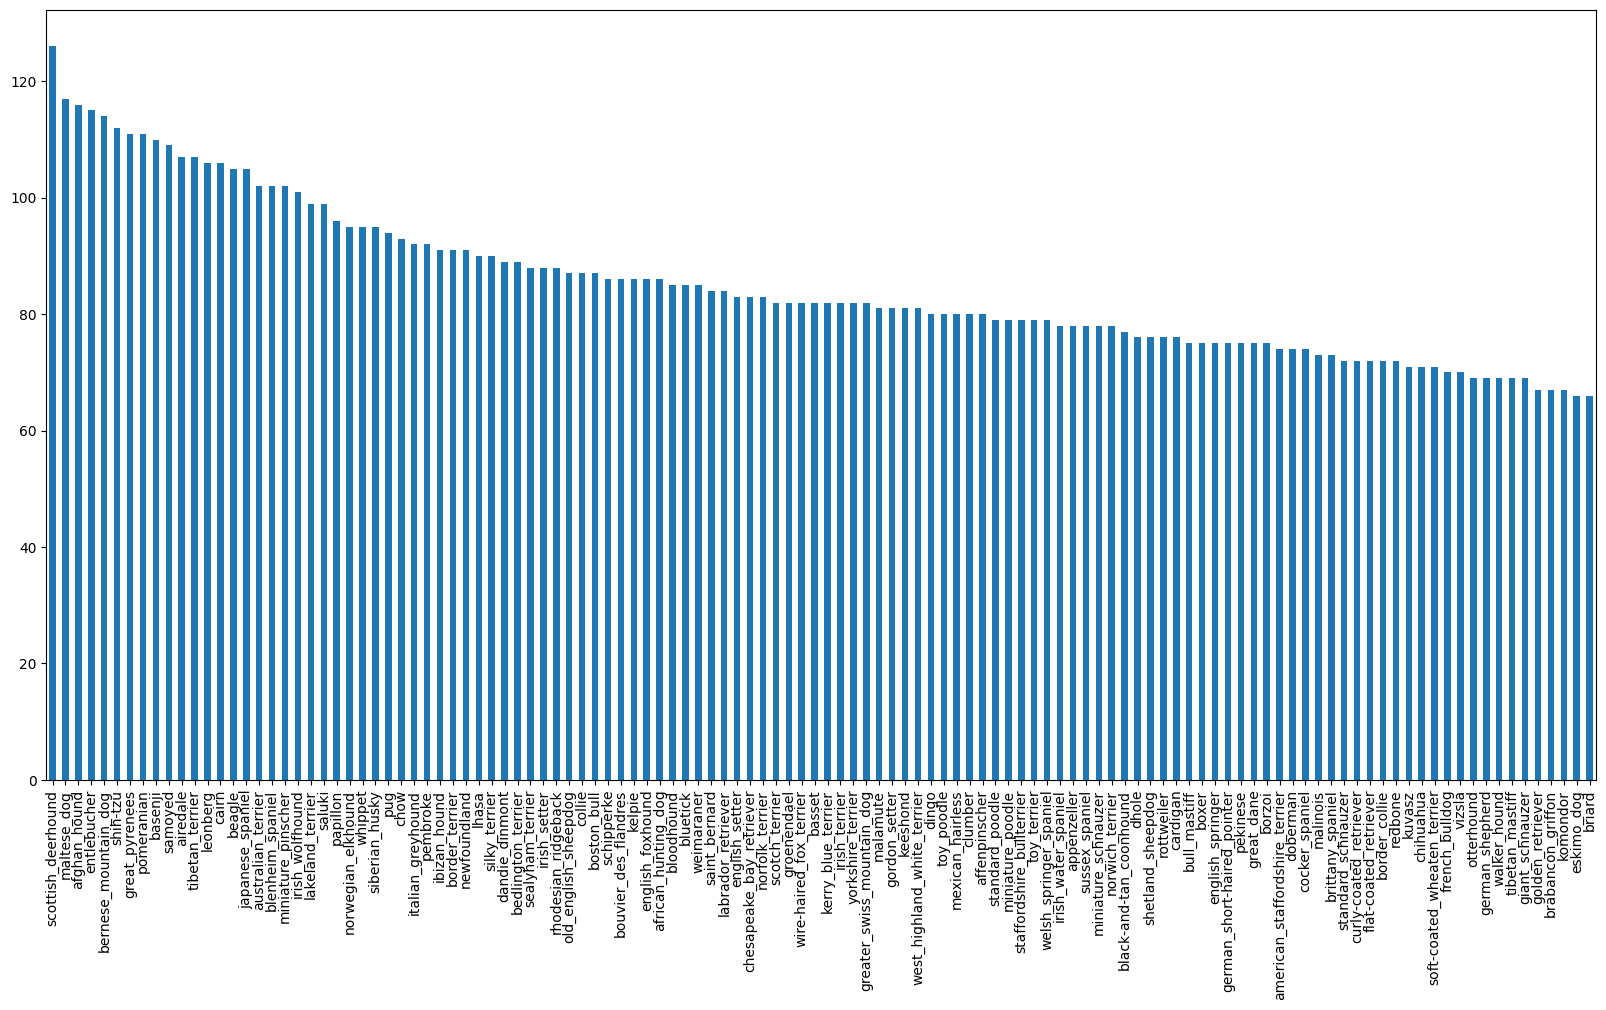

In [6]:
#Check how many images per breed of dog. 
labels_df['breed'].value_counts().plot.bar(figsize=(20,10))
print(f"Average Images per breed:{int(labels_df['breed'].value_counts().sum()/len(labels_df['breed'].unique()))}")
print(f"Total no of breeds:{len(labels_df['breed'].unique())}")

In [7]:
#Create an array of train images 
filenames = [os.path.join(train_images_path, fname + '.jpg') for fname in labels_df['id']]
filenames[:10]

['F:\\Temp\\Dog-Breed-ID-Comp\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'F:\\Temp\\Dog-Breed-ID-Comp\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Create class names array 
class_names = labels_df['breed'].unique()
class_names[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog'], dtype=object)

In [9]:
target_labels = [breed for breed in labels_df['breed']]
target_labels[:10]

['boston_bull',
 'dingo',
 'pekinese',
 'bluetick',
 'golden_retriever',
 'bedlington_terrier',
 'bedlington_terrier',
 'borzoi',
 'basenji',
 'scottish_deerhound']

In [10]:
# Example: Turn one label into array of boolean 
print(target_labels[0])
target_labels[0] == class_names
#Lets do for all the labels 
target_labels_encoded = [label == np.array(class_names) for label in target_labels]
target_labels_encoded[:2]

boston_bull


[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [11]:
#Import train test split from sklearn 
from sklearn.model_selection import train_test_split 
#Experiement with small data 1000 images 
NUM_IMAGES = 2000
#Split data into training & validation 
X_train, X_val, Y_train, Y_val = train_test_split(filenames[:NUM_IMAGES], target_labels_encoded[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(X_val), len(Y_train), len(Y_val)

(1600, 400, 1600, 400)

In [12]:
X_train[0], Y_train[0]

('F:\\Temp\\Dog-Breed-ID-Comp\\train\\17c5e8815cf0d086090a07b003b9b036.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,


In [13]:
IMAGE_SIZE = 224

# Lets write our preprocessing function
def process_image(image_path): 
    """
    This function will read image, resize the image and return into TF format. 
    Arguments: 
        image_path(str): Path of image
    Returns: 
        img: Tensor image
    """
    img = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    img = tf.io.decode_image(img, channels =3)
    # Convert the colour channel values from 0-225 values to 0-1 values
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to our desired size (224, 244)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img

In [14]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label
get_image_label(X_train[10], Y_train[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.37254903, 0.5764706 , 0.19215688],
         [0.36862746, 0.56078434, 0.20392159],
         [0.3372549 , 0.50980395, 0.20000002],
         ...,
         [1.        , 0.92549026, 0.3647059 ],
         [0.9843138 , 0.909804  , 0.36862746],
         [1.        , 0.9450981 , 0.43921572]],
 
        [[0.34901962, 0.52156866, 0.14117648],
         [0.3254902 , 0.49411768, 0.13333334],
         [0.37647063, 0.5411765 , 0.21176472],
         ...,
         [0.69411767, 0.6745098 , 0.18039216],
         [0.7803922 , 0.7568628 , 0.28627452],
         [0.7411765 , 0.7254902 , 0.29411766]],
 
        [[0.30980393, 0.4666667 , 0.09019608],
         [0.34509805, 0.5058824 , 0.13725491],
         [0.4156863 , 0.5803922 , 0.24313727],
         ...,
         [0.40784317, 0.43137258, 0.01568628],
         [0.5372549 , 0.5568628 , 0.16470589],
         [0.38431376, 0.41176474, 0.04705883]],
 
        ...,
 
        [[0.56078434, 0.7607844 

In [15]:
BATCH_SIZE = 32 

#Create function to create dataset batches 
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data= False, test_data=False): 
    """
    This function will help to accept Train Images (X) and labels (y). 
    Also Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
    Also accepts test data as input (no labels).
    """
    if test_data: 
        print("Creating Test data")
        test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        test_data = test_data.map(process_image).batch(BATCH_SIZE) 
        return test_data 
    
    #Create validation data
    if valid_data: 
        print("Creating Validation data")
        valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        valid_data = valid_data.map(get_image_label).batch(BATCH_SIZE)
        return valid_data
    
    #Shuffle and create training data
    else: 
        print("Creating Training Data") 
        train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))).shuffle(buffer_size = len(X))
        train_data = train_data.map(get_image_label).batch(BATCH_SIZE) 
        return train_data

In [16]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_val, Y_val, valid_data= True)

Creating Training Data
Creating Validation data


In [17]:
sample =next(iter(train_data))
sample[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [18]:
import matplotlib.pyplot as plt
def show_images (images, label):
    plt.figure(figsize = (12,12))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(class_names[tf.argmax(label[i])])
        plt.axis('off')

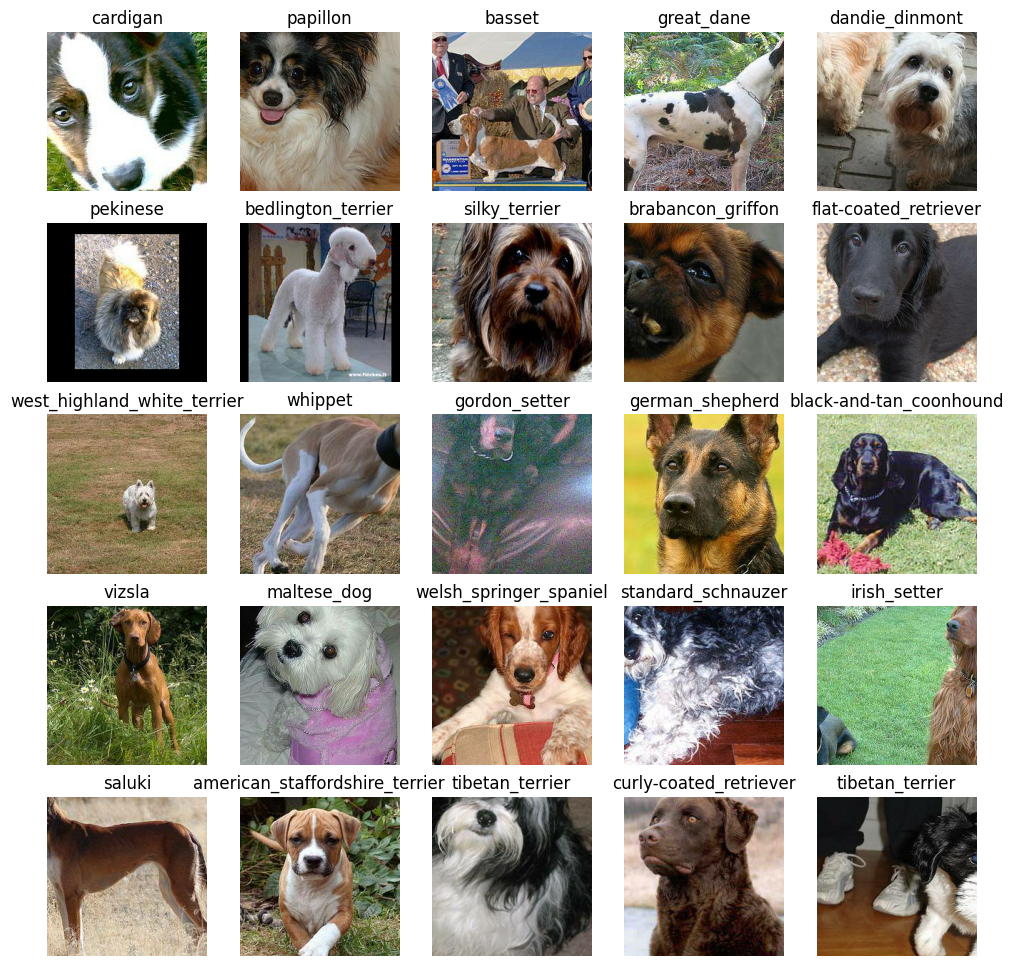

In [19]:
# visulaize training  images from the trianing data batch
train_images, train_labels = next (train_data.as_numpy_iterator())
show_images (train_images, train_labels)

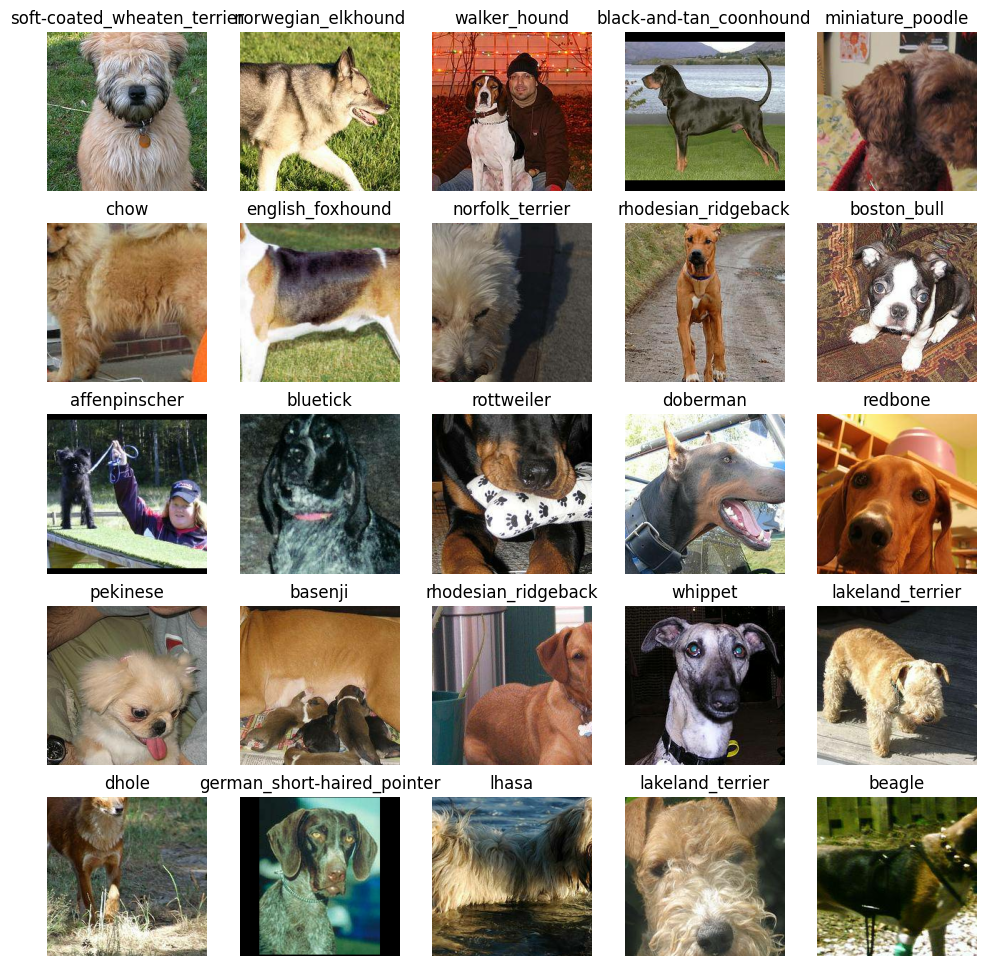

In [21]:
# visualize the validation data
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_images (val_images, val_labels)

## Creating Models

In [25]:
from tensorflow.keras import layers
def create_model ():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top =False, classes=len(class_names))
    base_model.trainable = False
    inputs = layers.Input(shape = (224, 224,3))
    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation ='softmax')(x)
    Model_dog_breed = tf.keras.Model(inputs, outputs)
    Model_dog_breed.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return Model_dog_breed

In [26]:
model = create_model()
# Callbacks 
EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, baseline=None, restore_best_weights=True
)

In [27]:
model_history = model.fit( train_data, steps_per_epoch= len(train_data), epochs= 5, validation_data= valid_data,
                    validation_steps= len (valid_data), callbacks = [EarlyStoppingCallbacks]
)

Epoch 1/5
50/50 [==============================] - 16s 98ms/step - loss: 4.1656 - accuracy: 0.1481 - val_loss: 2.7734 - val_accuracy: 0.3700
Epoch 2/5
50/50 [==============================] - 3s 65ms/step - loss: 1.7315 - accuracy: 0.6206 - val_loss: 1.9477 - val_accuracy: 0.5250
Epoch 3/5
50/50 [==============================] - 3s 65ms/step - loss: 0.9630 - accuracy: 0.8225 - val_loss: 1.6638 - val_accuracy: 0.5775
Epoch 4/5
50/50 [==============================] - 3s 65ms/step - loss: 0.6080 - accuracy: 0.9169 - val_loss: 1.5383 - val_accuracy: 0.6050
Epoch 5/5
50/50 [==============================] - 3s 65ms/step - loss: 0.4113 - accuracy: 0.9563 - val_loss: 1.4886 - val_accuracy: 0.5950


In [28]:
model.evaluate(valid_data)

13/13 [==============================] - 1s 47ms/step - loss: 1.4886 - accuracy: 0.5950


[1.4885926246643066, 0.5950000286102295]

In [29]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

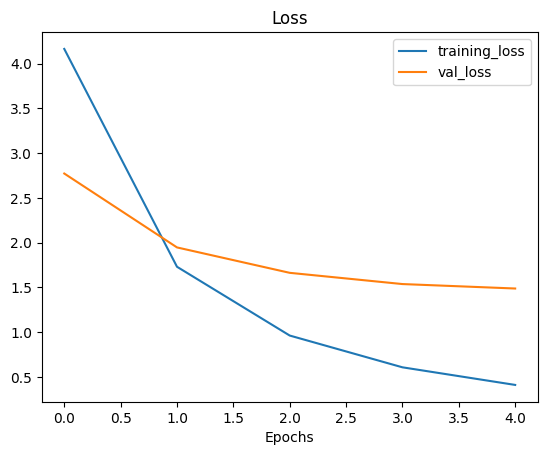

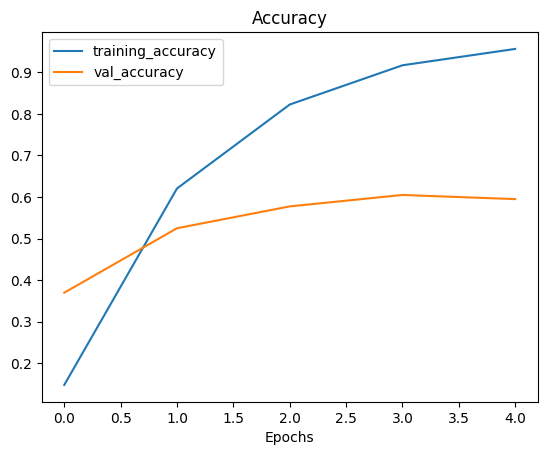

In [31]:
plot_loss_curves(model_history)

In [32]:
predictions = model.predict(valid_data)
#predictions
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {class_names[np.argmax(predictions[0])]}") # the predicted label

13/13 [==============================] - 2s 59ms/step
[5.50281373e-04 3.69397574e-04 2.97799910e-04 1.76490852e-04
 8.52771860e-04 1.06124510e-03 2.54293147e-04 9.21865692e-04
 2.98185693e-03 4.04534600e-04 2.34030449e-04 4.01357771e-04
 3.33821215e-02 2.01412535e-04 6.02706801e-03 7.26876664e-04
 6.41389983e-03 1.62114258e-04 2.08200036e-05 1.15052890e-02
 1.28534082e-02 1.45517857e-04 1.29895079e-05 3.61998044e-02
 1.24625687e-03 2.15269742e-03 1.22034042e-04 1.49749266e-03
 7.35439593e-04 1.16618881e-02 7.19111486e-05 2.11630817e-04
 9.55128344e-04 3.23065482e-02 2.78437827e-02 4.19471849e-04
 5.22278249e-03 3.47566679e-02 8.12032449e-05 9.08608781e-05
 3.67099237e-05 4.76775749e-04 1.92642445e-03 1.24121405e-04
 9.39026882e-04 7.11987377e-04 1.05900353e-05 1.08775287e-03
 3.58894067e-05 8.35179910e-03 5.75795013e-04 7.81379131e-05
 1.07505439e-04 3.17883998e-04 3.87197542e-05 5.96283237e-04
 3.27279529e-04 1.89321305e-04 1.33330817e-04 7.29247811e-04
 9.57980985e-04 1.30527842e-04 

In [33]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return class_names[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'briard'

In [34]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(class_names[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.48235297, 0.56078434, 0.3137255 ],
         [0.3803922 , 0.4666667 , 0.21568629],
         [0.33333334, 0.43137258, 0.1764706 ],
         ...,
         [0.32941177, 0.48627454, 0.2784314 ],
         [0.30588236, 0.454902  , 0.25490198],
         [0.32156864, 0.44705886, 0.2627451 ]],
 
        [[0.43529415, 0.5176471 , 0.25490198],
         [0.47450984, 0.56078434, 0.30588236],
         [0.2901961 , 0.3921569 , 0.13725491],
         ...,
         [0.3529412 , 0.48627454, 0.28627452],
         [0.31764707, 0.4431373 , 0.2509804 ],
         [0.30588236, 0.41176474, 0.23529413]],
 
        [[0.2509804 , 0.33333334, 0.0627451 ],
         [0.5254902 , 0.6156863 , 0.34901962],
         [0.38823533, 0.48627454, 0.227451  ],
         ...,
         [0.29803923, 0.40784317, 0.21568629],
         [0.27450982, 0.37647063, 0.19215688],
         [0.2784314 , 0.3803922 , 0.20392159]],
 
        ...,
 
        [[0.21176472, 0.33333334, 0.20784315],
         [0.24705884, 0.36862746, 0.24705

In [35]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

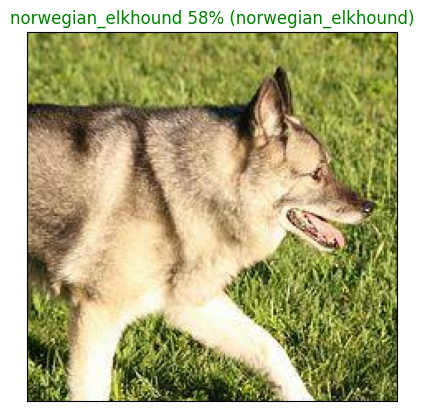

In [36]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [37]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = class_names[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
     top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
     pass


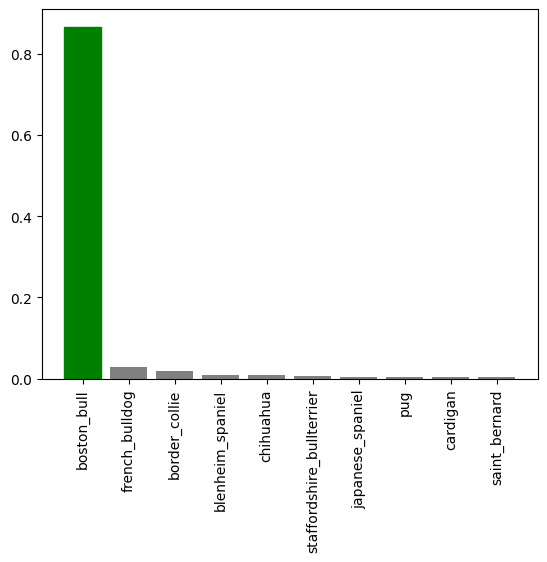

In [38]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

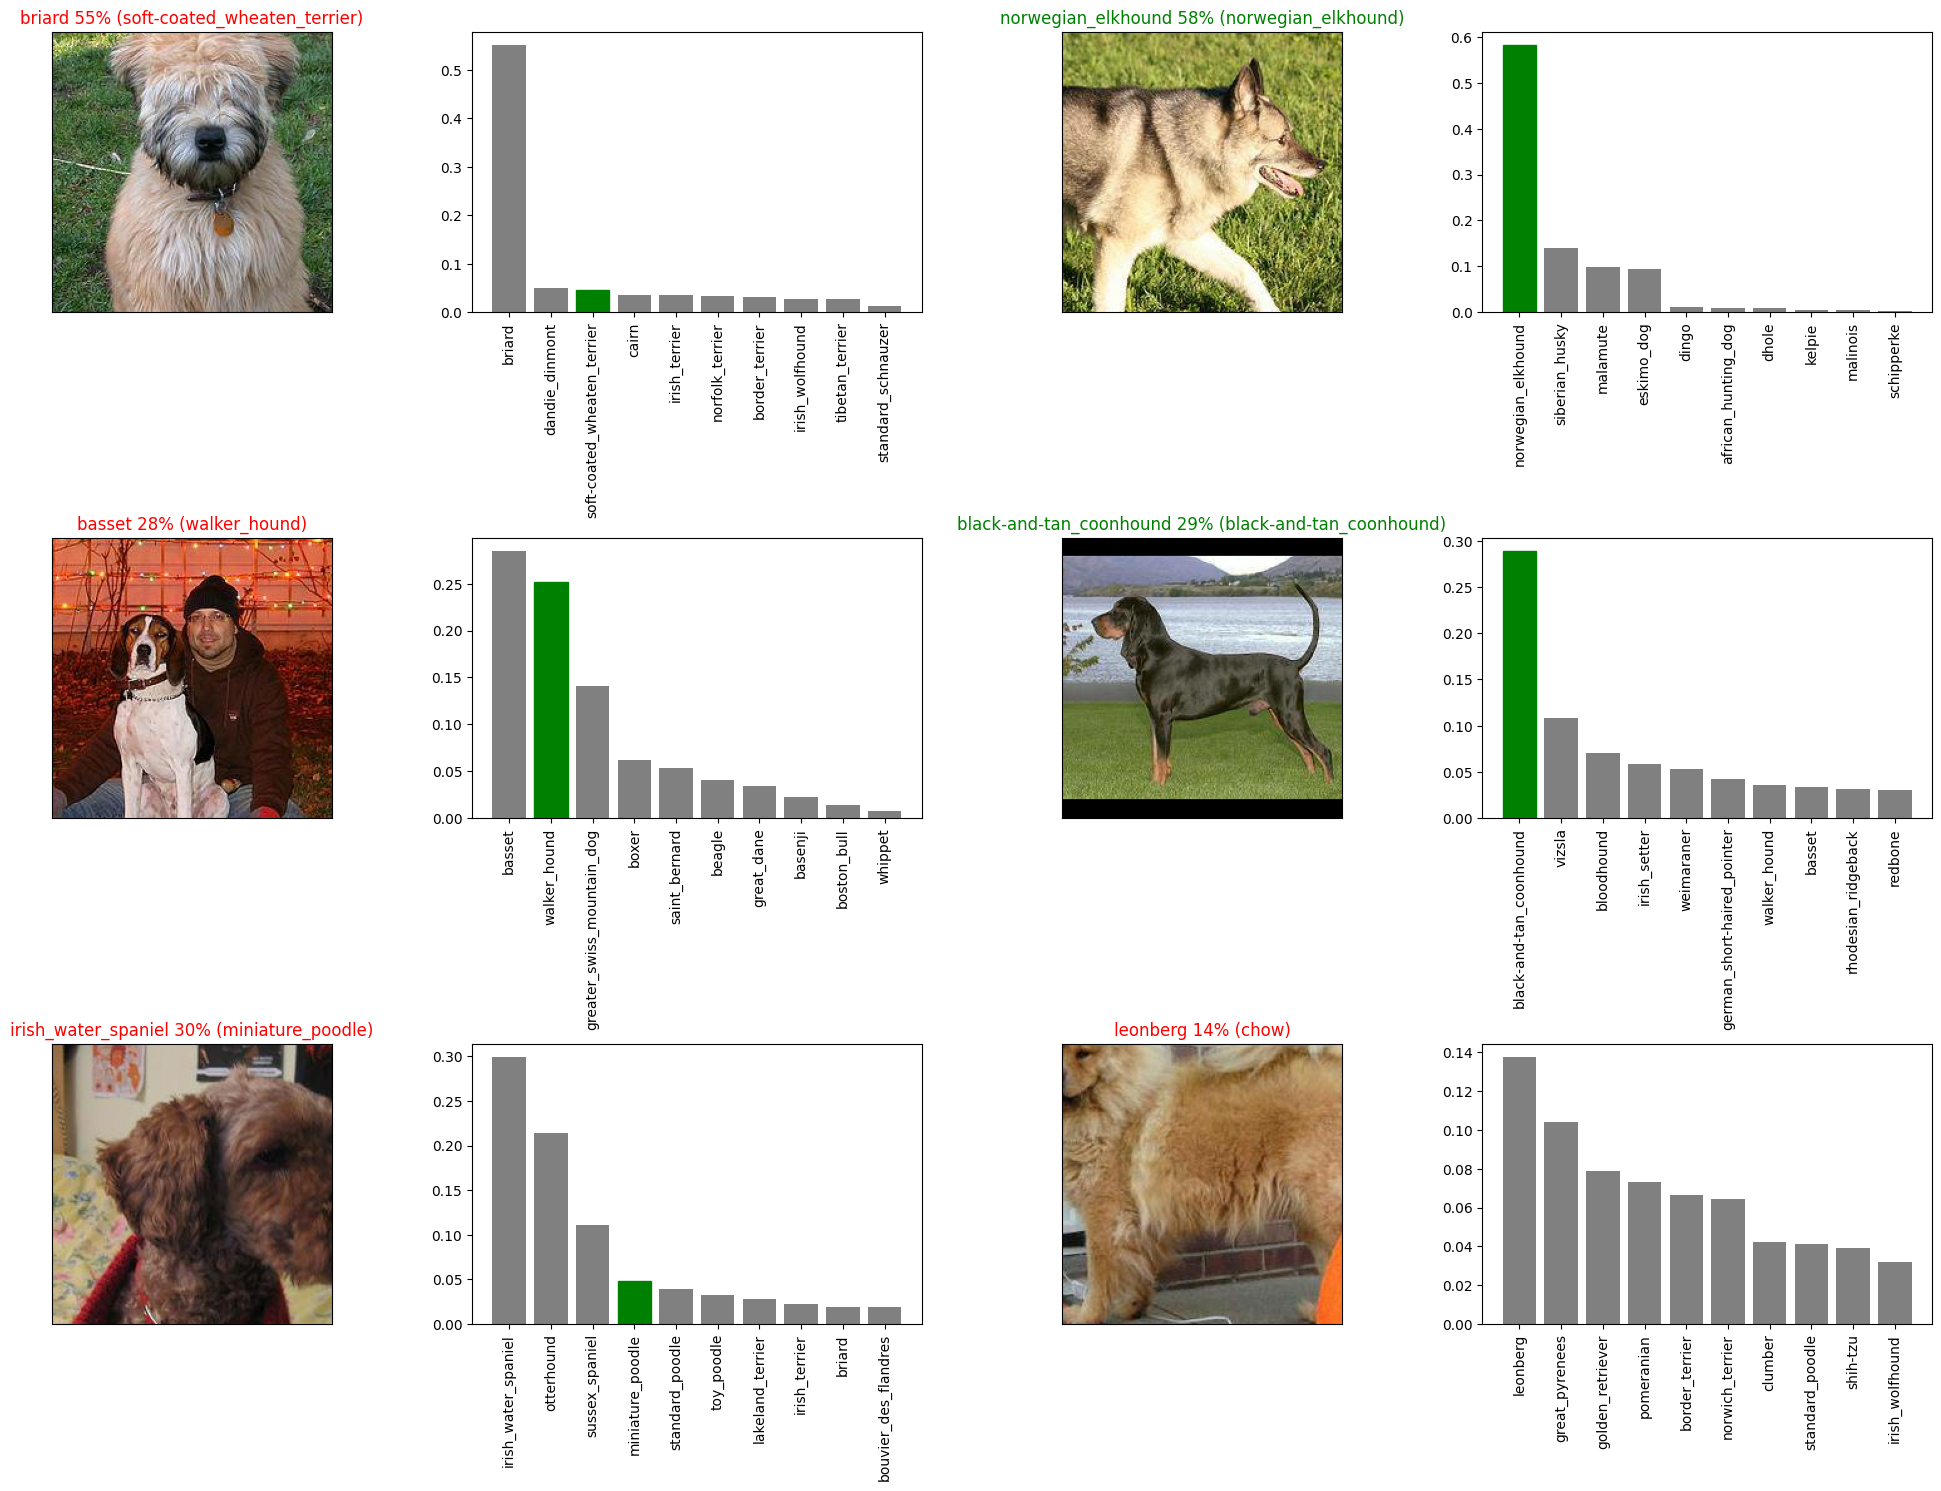

In [39]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()